In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

In [2]:
# Fetch historical gold price data (hourly) within the last 730 days
end_date = datetime.now()
start_date = end_date - timedelta(days=700)

gold_data = yf.download('GC=F', start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'), interval='1h')
gold_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-07-08 00:00:00-04:00,1740.400024,1740.400024,1737.599976,1739.900024,1739.900024,0
2022-07-08 01:00:00-04:00,1740.000000,1741.400024,1738.099976,1741.099976,1741.099976,3136
2022-07-08 02:00:00-04:00,1741.099976,1742.000000,1739.800049,1741.099976,1741.099976,3016
2022-07-08 03:00:00-04:00,1741.099976,1741.099976,1730.699951,1734.699951,1734.699951,12020
2022-07-08 04:00:00-04:00,1734.500000,1741.500000,1733.500000,1736.199951,1736.199951,8869
...,...,...,...,...,...,...
2024-06-06 19:00:00-04:00,2395.699951,2397.000000,2395.000000,2395.500000,2395.500000,1235
2024-06-06 20:00:00-04:00,2395.500000,2398.199951,2394.800049,2397.300049,2397.300049,2849
2024-06-06 21:00:00-04:00,2397.399902,2398.899902,2389.199951,2390.199951,2390.199951,6198


In [3]:
gold_data['Open_lag'] = gold_data['Open'].shift(1)
gold_data['High_lag'] = gold_data['High'].shift(1)
gold_data['Low_lag'] = gold_data['Low'].shift(1)
gold_data['Volume_lag'] = gold_data['Volume'].shift(1)
gold_data = gold_data.drop(columns=['Adj Close'])
gold_data = gold_data.dropna()
gold_data

,Open,High,Low,Close,Volume,Open_lag,High_lag,Low_lag,Volume_lag
Datetime,,,,,,,,,
2022-07-08 01:00:00-04:00,1740.000000,1741.400024,1738.099976,1741.099976,3136,1740.400024,1740.400024,1737.599976,0.0
2022-07-08 02:00:00-04:00,1741.099976,1742.000000,1739.800049,1741.099976,3016,1740.000000,1741.400024,1738.099976,3136.0
2022-07-08 03:00:00-04:00,1741.099976,1741.099976,1730.699951,1734.699951,12020,1741.099976,1742.000000,1739.800049,3016.0
2022-07-08 04:00:00-04:00,1734.500000,1741.500000,1733.500000,1736.199951,8869,1741.099976,1741.099976,1730.699951,12020.0
2022-07-08 05:00:00-04:00,1736.300049,1737.599976,1733.300049,1737.099976,4568,1734.500000,1741.500000,1733.500000,8869.0
...,...,...,...,...,...,...,...,...,...
2024-06-06 19:00:00-04:00,2395.699951,2397.000000,2395.000000,2395.500000,1235,2395.699951,2395.899902,2394.199951,1324.0
2024-06-06 20:00:00-04:00,2395.500000,2398.199951,2394.800049,2397.300049,2849,2395.699951,2397.000000,2395.000000,1235.0
2024-06-06 21:00:00-04:00,2397.399902,2398.899902,2389.199951,2390.199951,6198,2395.500000,2398.199951,2394.800049,2849.0


In [4]:
# Check if data was fetched
if gold_data.empty:
    print("Failed to fetch data. Please check the symbol and date range.")
else:
    # Prepare the data
    gold_data.loc[:, 'Change'] = gold_data['Close'] - gold_data['Open']
    gold_data.loc[:, 'Change_lag'] = gold_data['Open'] - gold_data['Open_lag']
    gold_data.loc[:, 'Volatility'] = gold_data['Change_lag'].abs().rolling(5).mean()
    gold_data.loc[:, 'Momentum'] = gold_data['Change_lag'].diff(10)
    gold_data = gold_data.dropna()
gold_data

,Open,High,Low,Close,Volume,Open_lag,High_lag,Low_lag,Volume_lag,Change,Change_lag,Volatility,Momentum
Datetime,,,,,,,,,,,,,
2022-07-08 11:00:00-04:00,1746.699951,1747.699951,1741.099976,1741.300049,11432,1735.099976,1751.699951,1735.000000,25314.0,-5.399902,11.599976,3.719995,12.000000
2022-07-08 12:00:00-04:00,1741.300049,1743.400024,1739.199951,1740.900024,6333,1746.699951,1747.699951,1741.099976,11432.0,-0.400024,-5.399902,4.299976,-6.499878
2022-07-08 13:00:00-04:00,1741.099976,1743.000000,1740.300049,1742.500000,17846,1741.300049,1743.400024,1739.199951,6333.0,1.400024,-0.200073,4.300000,-0.200073
2022-07-08 14:00:00-04:00,1742.500000,1742.900024,1740.300049,1740.400024,2452,1741.099976,1743.000000,1740.300049,17846.0,-2.099976,1.400024,4.080005,8.000000
2022-07-08 15:00:00-04:00,1740.300049,1742.099976,1739.699951,1740.000000,2679,1742.500000,1742.900024,1740.300049,2452.0,-0.300049,-2.199951,4.159985,-4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-06 19:00:00-04:00,2395.699951,2397.000000,2395.000000,2395.500000,1235,2395.699951,2395.899902,2394.199951,1324.0,-0.199951,0.000000,1.160010,1.199951
2024-06-06 20:00:00-04:00,2395.500000,2398.199951,2394.800049,2397.300049,2849,2395.699951,2397.000000,2395.000000,1235.0,1.800049,-0.199951,1.139990,1.900146
2024-06-06 21:00:00-04:00,2397.399902,2398.899902,2389.199951,2390.199951,6198,2395.500000,2398.199951,2394.800049,2849.0,-7.199951,1.899902,1.319971,-0.800049


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Define features and target variable
features = ['Open', 'Volume_lag', 'Change_lag', 'Volatility', 'Momentum']
X = gold_data[features]
y = gold_data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, input_dim=5, activation='relu', kernel_regularizer=l2(0.01), kernel_initializer='he_normal'),
    Dropout(0.3),  # Dropout added for regularization
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),  # Another dropout layer
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)  # Output layer
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred.flatten())
mse = mean_squared_error(y_test, y_pred.flatten())

# Display the predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.index = pd.to_datetime(results.index)

# Sort DataFrame based on datetime index
results_sorted = results.sort_index()
print(results_sorted)

c:\Users\theol\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
                                Actual    Predicted
Datetime                                           
2022-07-08 14:00:00-04:00  1740.400024  1726.920532
2022-07-10 20:00:00-04:00  1740.000000  1716.090088
2022-07-10 22:00:00-04:00  1739.699951  1735.198853
2022-07-11 02:00:00-04:00  1737.400024  1714.705444
2022-07-11 18:00:00-04:00  1731.800049  1708.412842
...                                ...          ...
2024-06-05 16:00:00-04:00  2375.300049  2340.282471
2024-06-05 20:00:00-04:00  2374.699951  2335.705811
2024-06-06 07:00:00-04:00  2378.800049  2344.791504
2024-06-06 16:00:00-04:00  2395.199951  2361.955566
2024-06-06 22:00:00-04:00  2395.800049  2342.321777

[1658 rows x 2 columns]


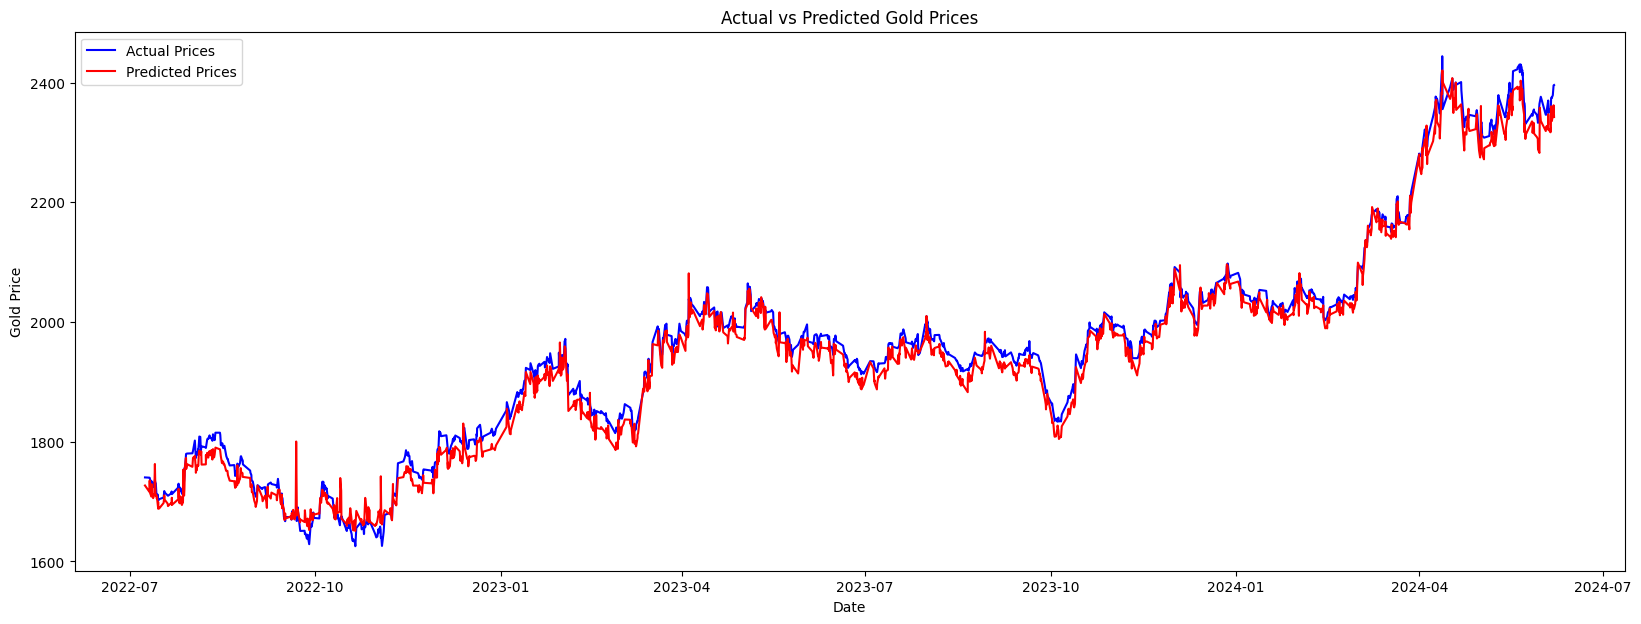

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
plt.plot(results_sorted.index, results_sorted['Actual'], label='Actual Prices', color='blue')
plt.plot(results_sorted.index, results_sorted['Predicted'], label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.show()

In [19]:
print({mse}, {r2_score})

{435.4518126419086} {<function r2_score at 0x0000022479D17060>}


In [ ]:
#forecast foward 1 day 
end_date = datetime.now() - timedelta(days=1)
start_date = end_date - timedelta(days=2)
forecast_data = yf.download('GC=F', start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'), interval='1h')
forecast_data = forecast_data.tail(1)

#validation data
end_date = datetime.now()
start_date = end_date - timedelta(days=1)
actual = yf.download('GC=F', start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'), interval='1h')

#iterate through the next 24 hours
for i in range(1,25):
    features = ['Volume', 'Open', 'Volatility', 'Momentum']
    X = forecast_data[features]
    X = scaler.fit_transform(X)
    y = model.predict(X).flatten()

    





